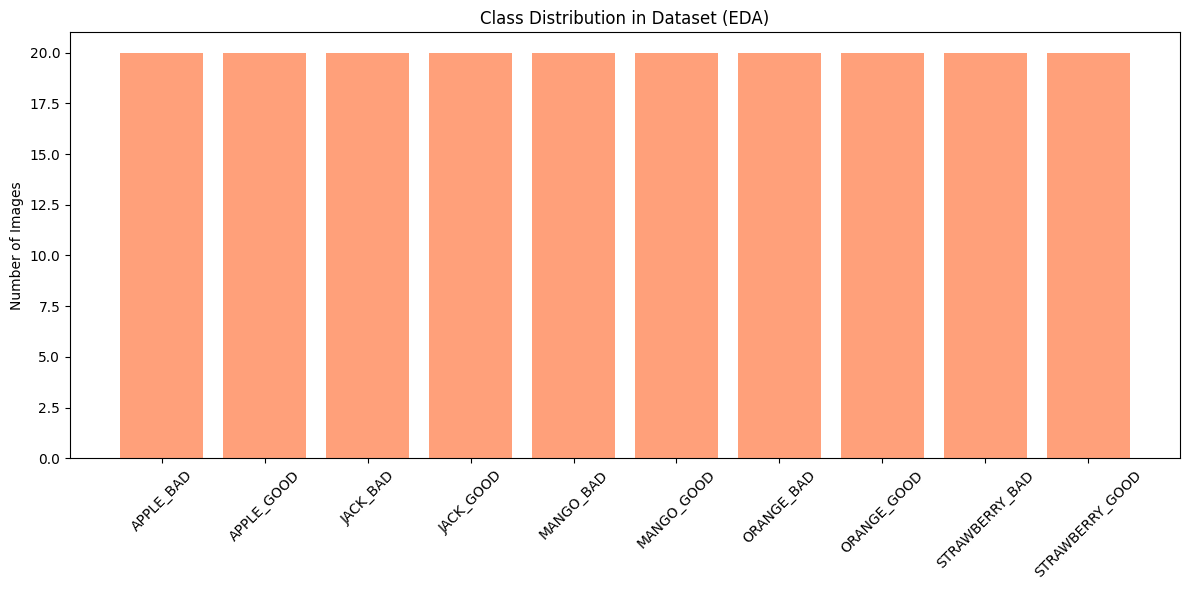

In [4]:
import os
import matplotlib.pyplot as plt

def count_images_in_folder(folder_path):
    class_counts = {}
    for class_name in os.listdir(folder_path):
        class_dir = os.path.join(folder_path, class_name)
        if os.path.isdir(class_dir):
            image_files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
            class_counts[class_name] = len(image_files)
    return class_counts

# Path to dataset
dataset_folder = "IMAGES"
class_counts = count_images_in_folder(dataset_folder)

# Plot
plt.figure(figsize=(12,6))

# Orange-pink blend (use one or multiple colors if you want gradient)
bar_colors = ['#FFA07A' for _ in class_counts]  # Light salmon/orange-pink

plt.bar(class_counts.keys(), class_counts.values(), color=bar_colors)
plt.xticks(rotation=45)
plt.ylabel("Number of Images")
plt.title("Class Distribution in Dataset (EDA)")
plt.tight_layout()
plt.show()


Train set distribution: {'APPLE_BAD': 16, 'APPLE_GOOD': 16, 'JACK_BAD': 16, 'JACK_GOOD': 16, 'MANGO_BAD': 16, 'MANGO_GOOD': 16, 'ORANGE_BAD': 16, 'ORANGE_GOOD': 16, 'STRAWBERRY_BAD': 16, 'STRAWBERRY_GOOD': 16}
Validation set distribution: {'APPLE_BAD': 4, 'APPLE_GOOD': 4, 'JACK_BAD': 4, 'JACK_GOOD': 4, 'MANGO_BAD': 4, 'MANGO_GOOD': 4, 'ORANGE_BAD': 4, 'ORANGE_GOOD': 4, 'STRAWBERRY_BAD': 4, 'STRAWBERRY_GOOD': 4}


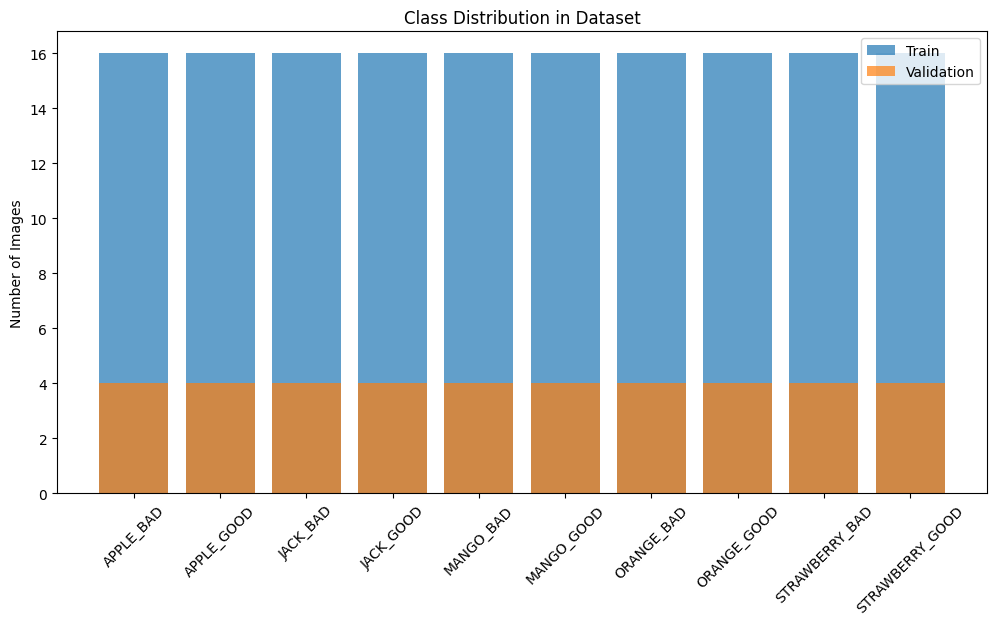

In [ ]:
#DATA ANALYSIS AND EDA

import os
from collections import Counter
import matplotlib.pyplot as plt

def count_images_in_folder(folder_path):
    class_counts = {}
    for class_name in os.listdir(folder_path):
        class_dir = os.path.join(folder_path, class_name)
        if os.path.isdir(class_dir):
            class_counts[class_name] = len(os.listdir(class_dir))
    return class_counts

train_folder = "DATA/train"
val_folder = "DATA/val"

train_counts = count_images_in_folder(train_folder)
val_counts = count_images_in_folder(val_folder)

print("Train set distribution:", train_counts)
print("Validation set distribution:", val_counts)

# Plot class distribution
plt.figure(figsize=(12,6))
plt.bar(train_counts.keys(), train_counts.values(), alpha=0.7, label='Train')
plt.bar(val_counts.keys(), val_counts.values(), alpha=0.7, label='Validation')
plt.xticks(rotation=45)
plt.ylabel("Number of Images")
plt.title("Class Distribution in Dataset")
plt.legend()
plt.show()


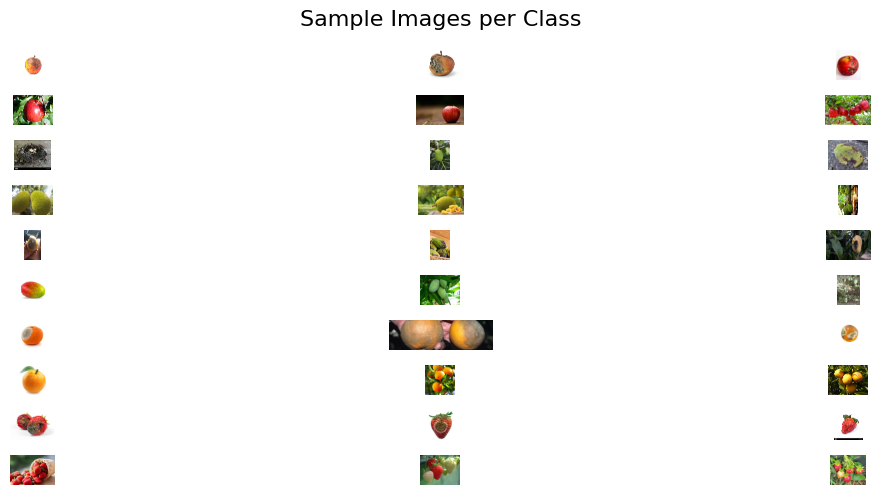

In [4]:
import cv2
import matplotlib.pyplot as plt

def plot_sample_images(dataset_path, classes, samples_per_class=3):
    plt.figure(figsize=(15, 5))
    i = 1
    for class_name in classes:
        class_dir = os.path.join(dataset_path, class_name)
        images = os.listdir(class_dir)[:samples_per_class]
        for img_name in images:
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(len(classes), samples_per_class, i)
            plt.imshow(img)
            plt.axis('off')
            if i % samples_per_class == 1:
                plt.ylabel(class_name, rotation=0, labelpad=50, fontsize=12)
            i += 1
    plt.suptitle("Sample Images per Class", fontsize=16)
    plt.tight_layout()
    plt.show()

all_classes = list(train_counts.keys())
plot_sample_images(train_folder, all_classes)


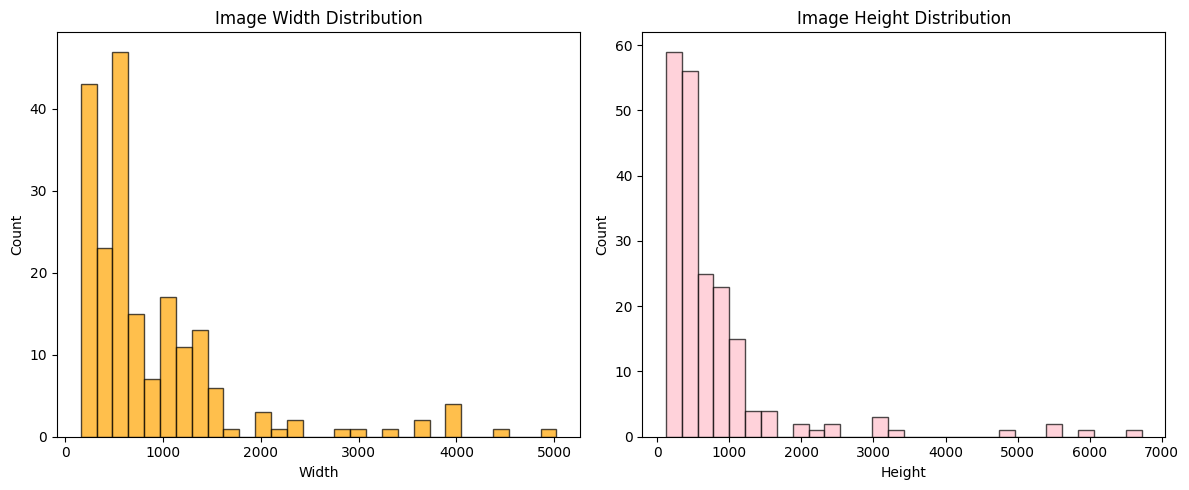

In [6]:
import os
import cv2
import matplotlib.pyplot as plt

def get_image_sizes(folder_path):
    widths, heights = [], []
    for class_name in os.listdir(folder_path):
        class_dir = os.path.join(folder_path, class_name)
        if os.path.isdir(class_dir):
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                img = cv2.imread(img_path)
                if img is not None and len(img.shape) == 3:
                    h, w, _ = img.shape
                    if w > 0 and h > 0:  # skip corrupted or zero-sized
                        widths.append(w)
                        heights.append(h)
    return widths, heights

dataset_folder = "IMAGES"
img_widths, img_heights = get_image_sizes(dataset_folder)

# Plotting histograms
plt.figure(figsize=(12, 5))

# Width Histogram
plt.subplot(1, 2, 1)
plt.hist(img_widths, bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.title("Image Width Distribution")
plt.xlabel("Width")
plt.ylabel("Count")

# Height Histogram
plt.subplot(1, 2, 2)
plt.hist(img_heights, bins=30, color='pink', edgecolor='black', alpha=0.7)
plt.title("Image Height Distribution")
plt.xlabel("Height")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [7]:
import os
import cv2

def find_corrupted_images(folder_path):
    corrupted = []
    for class_name in os.listdir(folder_path):
        class_dir = os.path.join(folder_path, class_name)
        if os.path.isdir(class_dir):
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                img = cv2.imread(img_path)
                if img is None:
                    corrupted.append(img_path)
    return corrupted

# Run on the main IMAGES folder
image_folder = "IMAGES"
corrupted_images = find_corrupted_images(image_folder)

# Output result
print("Corrupted images:", corrupted_images)


Corrupted images: []


In [ ]:
#Resizing Images

import os
import cv2

# Paths
input_base_path = "C:/Users/muhdf/OneDrive/Desktop/GALEYA/ML/FRUIT/IMAGES"
output_base_path = "C:/Users/muhdf/OneDrive/Desktop/GALEYA/ML/FRUIT/IMAGES_RESIZED"

# Set size (width, height)
target_size = (256, 256)

# Create output base folder
os.makedirs(output_base_path, exist_ok=True)

# Resize images per class
def resize_images(input_path, output_path):
    for class_name in os.listdir(input_path):
        class_input_path = os.path.join(input_path, class_name)
        class_output_path = os.path.join(output_path, class_name)

        if not os.path.isdir(class_input_path):
            continue

        os.makedirs(class_output_path, exist_ok=True)

        for filename in os.listdir(class_input_path):
            file_path = os.path.join(class_input_path, filename)

            img = cv2.imread(file_path)
            if img is None:
                print(f"Skipping corrupted image: {file_path}")
                continue

            # Resize and save
            img_resized = cv2.resize(img, target_size)
            save_path = os.path.join(class_output_path, filename)
            cv2.imwrite(save_path, img_resized)

        print(f"[{class_name}] images resized and saved to: {class_output_path}")

# Run it
resize_images(input_base_path, output_base_path)


[APPLE_BAD] images resized and saved to: C:/Users/muhdf/OneDrive/Desktop/GALEYA/ML/FRUIT/IMAGES_RESIZED\APPLE_BAD
[APPLE_GOOD] images resized and saved to: C:/Users/muhdf/OneDrive/Desktop/GALEYA/ML/FRUIT/IMAGES_RESIZED\APPLE_GOOD
[JACK_BAD] images resized and saved to: C:/Users/muhdf/OneDrive/Desktop/GALEYA/ML/FRUIT/IMAGES_RESIZED\JACK_BAD
[JACK_GOOD] images resized and saved to: C:/Users/muhdf/OneDrive/Desktop/GALEYA/ML/FRUIT/IMAGES_RESIZED\JACK_GOOD
[MANGO_BAD] images resized and saved to: C:/Users/muhdf/OneDrive/Desktop/GALEYA/ML/FRUIT/IMAGES_RESIZED\MANGO_BAD
[MANGO_GOOD] images resized and saved to: C:/Users/muhdf/OneDrive/Desktop/GALEYA/ML/FRUIT/IMAGES_RESIZED\MANGO_GOOD
[ORANGE_BAD] images resized and saved to: C:/Users/muhdf/OneDrive/Desktop/GALEYA/ML/FRUIT/IMAGES_RESIZED\ORANGE_BAD
[ORANGE_GOOD] images resized and saved to: C:/Users/muhdf/OneDrive/Desktop/GALEYA/ML/FRUIT/IMAGES_RESIZED\ORANGE_GOOD
[STRAWBERRY_BAD] images resized and saved to: C:/Users/muhdf/OneDrive/Desktop/GA